In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import math

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('https://raw.githubusercontent.com/danielhartanto253/dataset_covid/main/Dataset/Afghanistan_selected.csv')

data.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-22,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-23,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-24,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-25,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-26,AF,Afghanistan,EMRO,0,0,0,0


In [3]:
data.Date_reported = data.Date_reported.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d').date())
data.set_index('Date_reported', inplace=True)
data.head()

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2020-01-22,AF,Afghanistan,EMRO,0,0,0,0
2020-01-23,AF,Afghanistan,EMRO,0,0,0,0
2020-01-24,AF,Afghanistan,EMRO,0,0,0,0
2020-01-25,AF,Afghanistan,EMRO,0,0,0,0
2020-01-26,AF,Afghanistan,EMRO,0,0,0,0


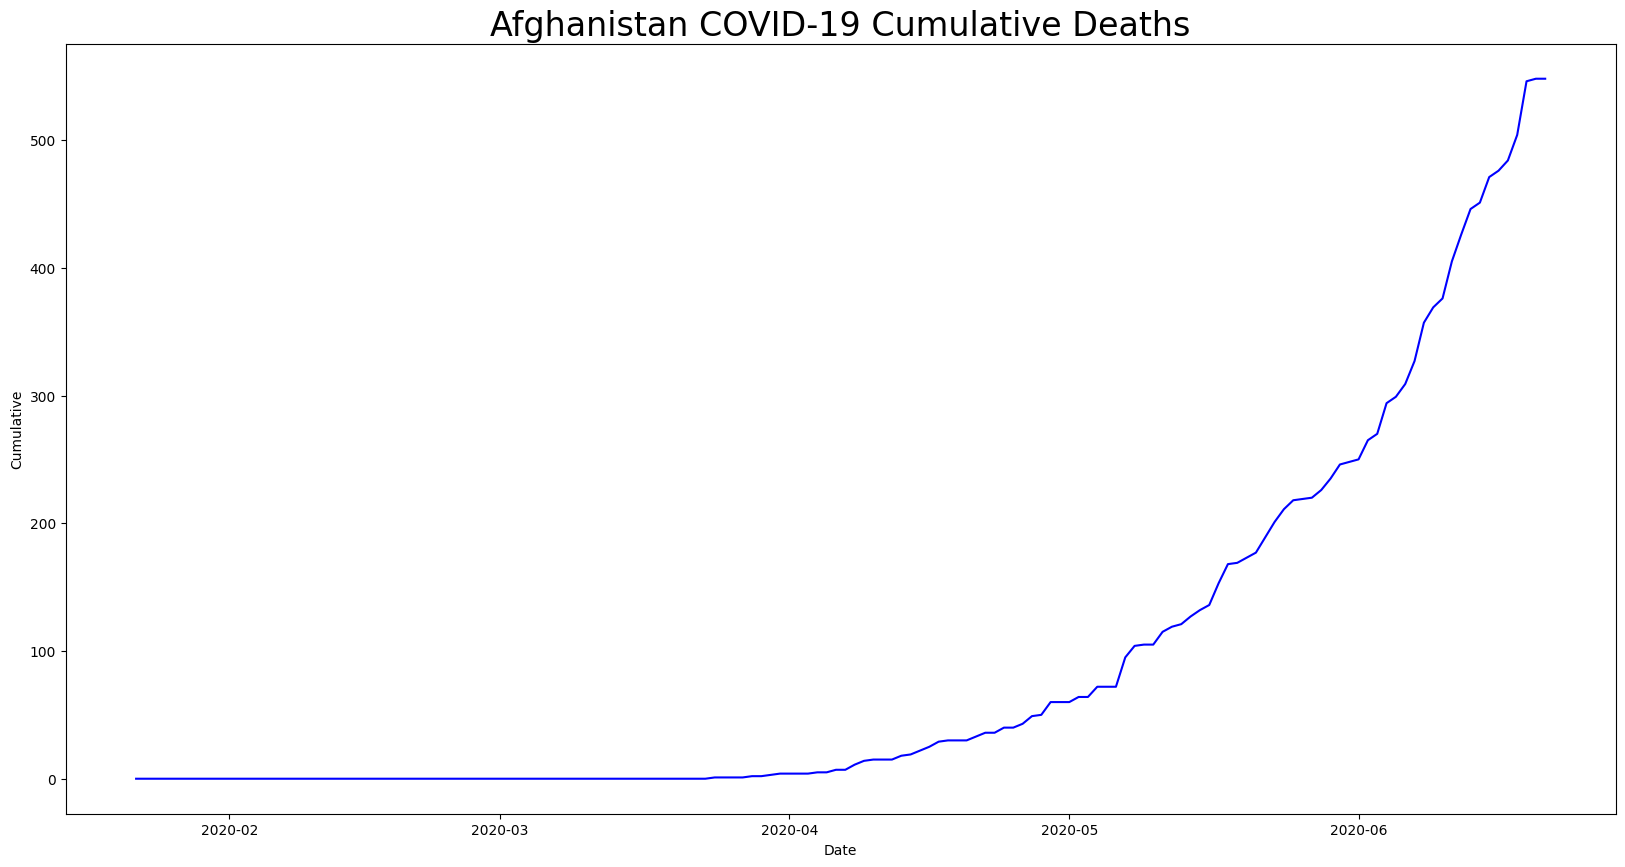

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
#plt.plot(data.index, data.Cumulative_cases, color='red', label='Cumulative_cases')
plt.plot(data.index, data.Cumulative_deaths, color='blue', label='Cumulative_deaths')
plt.title('Afghanistan COVID-19 Cumulative Deaths', fontsize=24)
plt.xlabel('Date')
plt.ylabel('Cumulative')

plt.show()

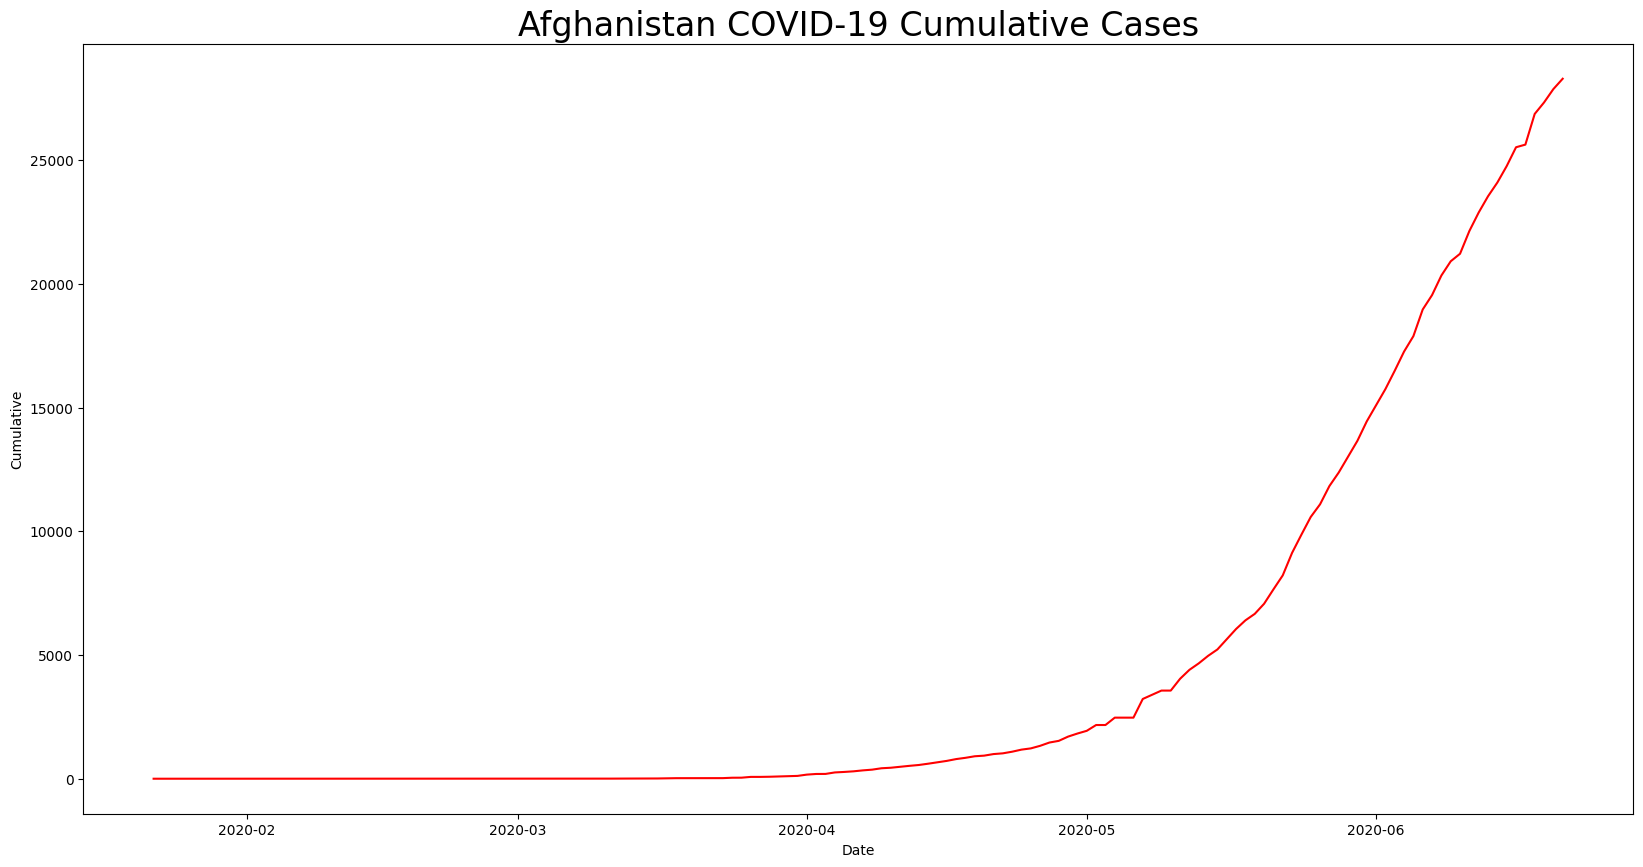

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(data.index, data.Cumulative_cases, color='red', label='Cumulative_cases')
#plt.plot(data.index, data.Cumulative_deaths, color='blue', label='Cumulative_deaths')
plt.title('Afghanistan COVID-19 Cumulative Cases', fontsize=24)
plt.xlabel('Date')
plt.ylabel('Cumulative')

plt.show()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152 entries, 2020-01-22 to 2020-06-21
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country_code       152 non-null    object
 1   Country            152 non-null    object
 2   WHO_region         152 non-null    object
 3   New_cases          152 non-null    int64 
 4   Cumulative_cases   152 non-null    int64 
 5   New_deaths         152 non-null    int64 
 6   Cumulative_deaths  152 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 9.5+ KB


In [7]:
from sklearn.preprocessing import MinMaxScaler

feature = data.iloc[:, 4:5]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feature)

In [8]:
def createXY(dataset, n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
        input_features = dataset[i - n_past:i]
        target = dataset[i]

        dataX.append(input_features)
        dataY.append(target)
    return np.array(dataX), np.array(dataY)

In [9]:
def extend_dataset_with_future(dataset, n_future):
    extended_dataset = np.copy(dataset)

    for i in range(1, n_future + 1):
        new_data_point = dataset[-i]
        extended_dataset = np.vstack([extended_dataset, new_data_point])

    return extended_dataset

In [10]:
dataX,dataY=createXY(scaled_data, 1)
dataX = dataX.reshape((dataX.shape[0], dataX.shape[1], 1))
print("dataX Shape-- ",dataX.shape)
print("dataY Shape-- ",dataY.shape)

dataX Shape--  (151, 1, 1)
dataY Shape--  (151, 1)


In [11]:
## menambah jumlah data berdasarkan data terakhir untuk waktu forecasting
extended_data = extend_dataset_with_future(scaled_data, 5)
extend_dataX,extend_dataY=createXY(extended_data, 1)
extend_dataX = extend_dataX.reshape((extend_dataX.shape[0], extend_dataX.shape[1], 1))
print("extended_dataX Shape-- ",extend_dataX.shape)
print("extended_dataY Shape-- ",extend_dataY.shape)

extended_dataX Shape--  (156, 1, 1)
extended_dataY Shape--  (156, 1)


In [12]:
#from keras.models import Sequential
#from keras.layers import LSTM, Dense
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD, Adam
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
#from tensorflow.keras.metrics import mean_squared_error, mean_absolute_error

In [13]:
#model = Sequential([
#    LSTM(250, activation='relu', input_shape=(dataX.shape[1], dataX.shape[2])),
#    Dense(1)
#])
#model.compile(loss='mse', optimizer='adam')
#
#model.fit(dataX, dataY, batch_size=16, epochs=100, verbose=0)

In [14]:
#Initialising the model
#model = Sequential()

#Adding LSTM layers
#model.add(LSTM(50,
#          return_sequences = True,
#          input_shape = (dataX.shape[1],1)))
#model.add(LSTM(50,
#          return_sequences = False))
#model.add(Dense(25))

#Adding the output layer
#model.add(Dense(1))

#Compiling the model
#model.compile(optimizer = 'adam',
#              loss = 'mean_squared_error',
#              metrics = ["accuracy"])

#Fitting the model
#model.fit(dataX,
#          dataY,
#          batch_size = 1,
#          epochs = 12)
#model.summary()

In [15]:
# initializing the RNN
model = Sequential()

# adding RNN layers and dropout regularization
model.add(SimpleRNN(units = 100,
                    activation = "tanh",
                    return_sequences = True,
                    input_shape = (dataX.shape[1],1)))
model.add(Dropout(0.2))

model.add(SimpleRNN(units = 50,
                    activation = "relu",
                    return_sequences = True))

model.add(SimpleRNN(units = 50,
                    activation = "relu",
                    return_sequences = True))

model.add(SimpleRNN(units = 50))

# adding the output layer
model.add(Dense(units = 1,activation='relu'))

# compiling RNN
model.compile(optimizer = Adam(learning_rate=0.01,
                              #decay=1e-6,
                              momentum=0.9,
                              nesterov=True),
                              loss = "mean_squared_error",
                              metrics="mean_absolute_error",
                              )

# fitting the model
model.fit(dataX, dataY, epochs = 20, batch_size = 2)
model.summary()

Epoch 1/20
76/76 [==============================] - 16s 26ms/step - loss: 0.0197 - mean_absolute_error: 0.0819
Epoch 2/20
76/76 [==============================] - 2s 23ms/step - loss: 0.0012 - mean_absolute_error: 0.0198
Epoch 3/20
76/76 [==============================] - 3s 37ms/step - loss: 4.6492e-04 - mean_absolute_error: 0.0132
Epoch 4/20
76/76 [==============================] - 3s 35ms/step - loss: 0.0012 - mean_absolute_error: 0.0196
Epoch 5/20
76/76 [==============================] - 2s 28ms/step - loss: 0.0013 - mean_absolute_error: 0.0186
Epoch 6/20
76/76 [==============================] - 2s 24ms/step - loss: 0.0012 - mean_absolute_error: 0.0183
Epoch 7/20
76/76 [==============================] - 1s 13ms/step - loss: 7.8918e-04 - mean_absolute_error: 0.0175
Epoch 8/20
76/76 [==============================] - 1s 11ms/step - loss: 6.3789e-04 - mean_absolute_error: 0.0138
Epoch 9/20
76/76 [==============================] - 1s 11ms/step - loss: 0.0014 - mean_absolute_error: 0.02

In [16]:
from sklearn.metrics import mean_squared_error

predict = model.predict(extend_dataX)
test_mse = metrics.mean_squared_error(extend_dataY, predict)
test_mae = metrics.mean_absolute_error(extend_dataY, predict)
#mape = np.mean(np.abs((extend_dataY - predict) / extend_dataY)) * 100
r_squared = r2_score(extend_dataY, predict)
predict = scaler.inverse_transform(predict)

print("Mean Squared Error (MSE): ", test_mse)
print("Mean Absolute Error (MAE): ", test_mae)
print("Root Mean Squared Error (RMSE):", np.sqrt(test_mse))
#print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R²) atau Coefficient of Determination:", r_squared)

5/5 [==============================] - 0s 4ms/step
Mean Squared Error (MSE):  0.0001798574827366117
Mean Absolute Error (MAE):  0.007518788242105972
Root Mean Squared Error (RMSE): 0.013411095508444182
R-squared (R²) atau Coefficient of Determination: 0.9980739325922916


In [17]:
from datetime import datetime, timedelta

last_day_real = data.index[-1]
last_day_forecasst = last_day_real + timedelta(days=5)

date_used = pd.date_range(start=data.index[1], end=last_day_forecasst)

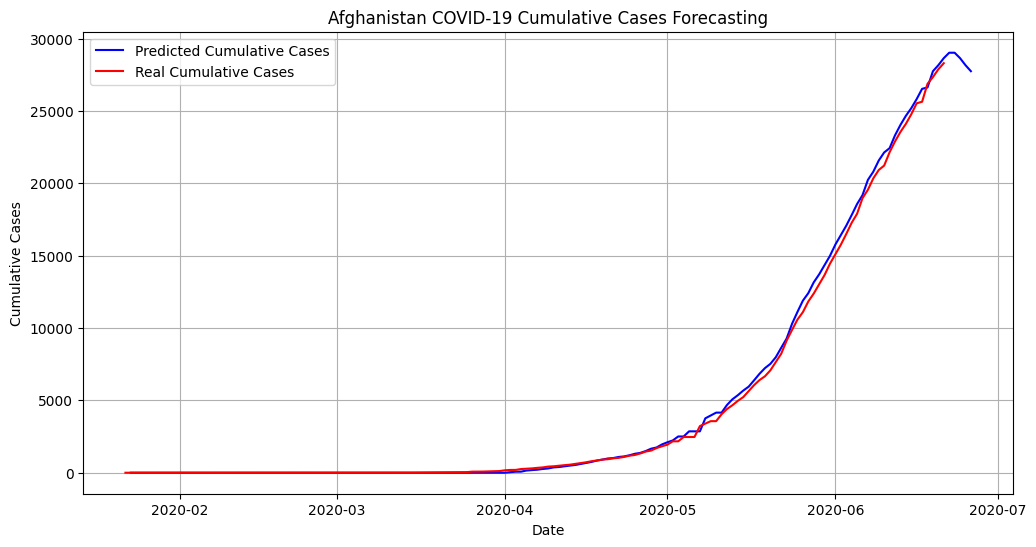

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(date_used, predict, color='blue', label='Predicted Cumulative Cases')
plt.plot(data.Cumulative_cases, color='red', label='Real Cumulative Cases')
plt.title('Afghanistan COVID-19 Cumulative Cases Forecasting')
plt.xlabel('Date')
plt.ylabel('Cumulative Cases')
plt.legend()
plt.grid(True)

plt.show()